In [5]:
# Dependencies Test
import random
import requests
import pandas as pd
import time
import openweathermapy.core as owm
import matplotlib.pyplot as plt
from config import api_key
from citipy import citipy
import numpy as np
import csv

In [11]:
cityname1 = {"Latitude":[],"Longitude":[],"City":[],"Temperature":[],"Humidity":[],"Cloudiness":[],"Wind Speed":[]}
citycoordinates = []
lon1 =[]
while (len(citycoordinates)<=10):
    tempLon = random.uniform(-180,180)
    if tempLon not in lon1:
        lon1.append(tempLon)
        tempLat = random.uniform(-90,90)
    else:
        pass
    tempcity = citipy.nearest_city(tempLat, tempLon)
    if tempcity not in citycoordinates:
        citycoordinates.append(tempcity)
        name = tempcity.city_name
        cityname1["City"].append(name)
        cityname1["Latitude"].append(tempLat)
        cityname1["Longitude"].append(tempLon)
    else:
        pass
    for city in cityname1["City"]:
        url = "http://api.openweathermap.org/data/2.5/weather?"
        query_url = url + "&q=" + city + "&appid=" + api_key
        response = requests.get(query_url).json()
        status_code = response['cod']

        if status_code == 200:
            cityname1["Temperature"].append(response['main']['temp'])
            cityname1["Humidity"].append(response['main']['humidity'])
            cityname1["Cloudiness"].append(response['clouds']['all'])
            cityname1["Wind Speed"].append(response['wind']['speed'])
            print(query_url)
            print("City Id: " , response["id"])
            print("City Name: " , response["name"])
            time.sleep(1)
        else:
            cityname1["Temperature"].append("NAN")
            cityname1["Humidity"].append("NAN")
            cityname1["Cloudiness"].append("NAN")
            cityname1["Wind Speed"].append("NAN")

http://api.openweathermap.org/data/2.5/weather?&q=callaway&appid=9c4bb9576cd41932b37e7ede0d5c7753
City Id:  5024237
City Name:  Callaway
http://api.openweathermap.org/data/2.5/weather?&q=callaway&appid=9c4bb9576cd41932b37e7ede0d5c7753
City Id:  5024237
City Name:  Callaway
http://api.openweathermap.org/data/2.5/weather?&q=callaway&appid=9c4bb9576cd41932b37e7ede0d5c7753
City Id:  5024237
City Name:  Callaway
http://api.openweathermap.org/data/2.5/weather?&q=callaway&appid=9c4bb9576cd41932b37e7ede0d5c7753
City Id:  5024237
City Name:  Callaway
http://api.openweathermap.org/data/2.5/weather?&q=callaway&appid=9c4bb9576cd41932b37e7ede0d5c7753
City Id:  5024237
City Name:  Callaway
http://api.openweathermap.org/data/2.5/weather?&q=bredasdorp&appid=9c4bb9576cd41932b37e7ede0d5c7753
City Id:  1015776
City Name:  Bredasdorp
http://api.openweathermap.org/data/2.5/weather?&q=callaway&appid=9c4bb9576cd41932b37e7ede0d5c7753
City Id:  5024237
City Name:  Callaway
http://api.openweathermap.org/data/2.

In [12]:
start_time = time.time()
for city in cityname1["City"]:
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = url + "&q=" + city + "&appid=" + api_key
    response = requests.get(query_url).json()
    status_code = response['cod']
    
    if status_code == 200:
        cityname1["Temperature"].append(response['main']['temp'])
        cityname1["Humidity"].append(response['main']['humidity'])
        cityname1["Cloudiness"].append(response['clouds']['all'])
        cityname1["Wind Speed"].append(response['wind']['speed'])
        print(query_url)
        print("City Id: " , response["id"])
        print("City Name: " , response["name"])
        time.sleep(1)
    else:
        cityname1["Temperature"].append("NAN")
        cityname1["Humidity"].append("NAN")
        cityname1["Cloudiness"].append("NAN")
        cityname1["Wind Speed"].append("NAN")
print("--- %s seconds ---" % (time.time() - start_time))

http://api.openweathermap.org/data/2.5/weather?&q=callaway&appid=9c4bb9576cd41932b37e7ede0d5c7753
City Id:  5024237
City Name:  Callaway
http://api.openweathermap.org/data/2.5/weather?&q=bredasdorp&appid=9c4bb9576cd41932b37e7ede0d5c7753
City Id:  1015776
City Name:  Bredasdorp
http://api.openweathermap.org/data/2.5/weather?&q=salinopolis&appid=9c4bb9576cd41932b37e7ede0d5c7753
City Id:  3389822
City Name:  Salinopolis
http://api.openweathermap.org/data/2.5/weather?&q=ushuaia&appid=9c4bb9576cd41932b37e7ede0d5c7753
City Id:  3833367
City Name:  Ushuaia
http://api.openweathermap.org/data/2.5/weather?&q=codrington&appid=9c4bb9576cd41932b37e7ede0d5c7753
City Id:  2160063
City Name:  Codrington
--- 6.413450717926025 seconds ---


AttributeError: 'dict' object has no attribute 'dropna'

In [123]:
# Convert gathered data to Dataframe and save to CSV file
cityname1 = pd.DataFrame(cityname1)
cityname1["Wind Speed"] = cityname1["Wind Speed"] *60
cityname1.to_csv('Results.csv', sep=',', encoding='utf-8',index=False)

ValueError: arrays must all be same length

ValueError: x and y must be the same size

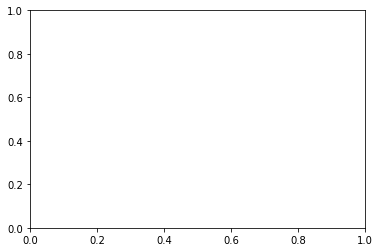

In [112]:
# * Temperature (F) vs. Latitude
plt.scatter(cityname1["Temperature"], cityname1["Latitude"], marker="o", facecolors="purple", edgecolors="black",
            alpha=0.75)
plt.legend()
plt.title("* Temperature (F) vs. Latitude")
plt.xlabel("Temprature")
plt.ylabel("Latitude")

Text(0,0.5,'Latitude')

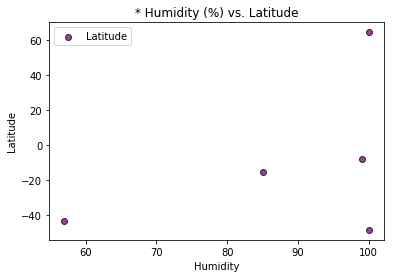

In [87]:
# * Humidity (%) vs. Latitude
plt.scatter(cityname1["Humidity"], cityname1["Latitude"], marker="o", facecolors="purple", edgecolors="black",
            alpha=0.75)
plt.legend()
plt.title("* Humidity (%) vs. Latitude")
plt.xlabel("Humidity")
plt.ylabel("Latitude")

Text(0,0.5,'Latitude')

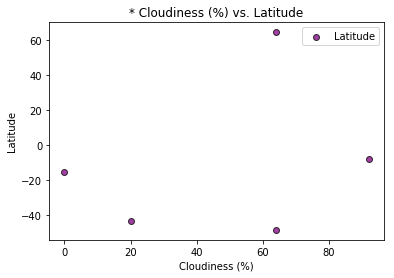

In [88]:
# * Cloudiness (%) vs. Latitude
plt.scatter(cityname1["Cloudiness"], cityname1["Latitude"], marker="o", facecolors="purple", edgecolors="black",
            alpha=0.75)
plt.legend()
plt.title("* Cloudiness (%) vs. Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")

Text(0,0.5,'Latitude')

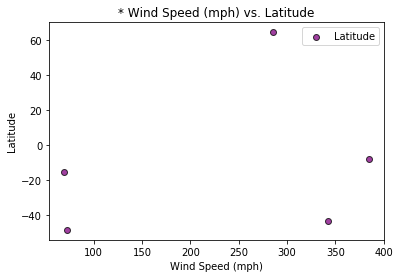

In [89]:
# * Wind Speed (mph) vs. Latitude
plt.scatter(cityname1["Wind Speed"], cityname1["Latitude"], marker="o", facecolors="purple", edgecolors="black",
            alpha=0.75)
plt.legend()
plt.title("* Wind Speed (mph) vs. Latitude")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")